In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource

import iris


from cartopy import crs
from cartopy import feature as cf
from geoviews import feature as gf

hv.notebook_extension('bokeh','matplotlib')
%output backend='matplotlib'
%opts Feature [projection=crs.Robinson()]

In [5]:
tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
         'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
         'Stamen Toner': STAMEN_TONER}

In [6]:
%%output backend='bokeh'
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]
hv.NdLayout({name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=ccrs.PlateCarree())
            for name, wmts in tiles.items()}, kdims=['Source']).cols(2)

b':NdLayout   [Source]\n   :WMTS   [Longitude,Latitude]'

In [17]:
modirisk = pd.read_csv('CulibelGeo.csv', encoding="ISO-8859-1")
pop = gv.Dataset(modirisk, kdims=['scientificName', 'sex', 'year'])
modirisk.head()

scientificName                              accessRights  \
0  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
1  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
2  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
3  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
4  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   

                                    datasetName ownerInstitutionCode  \
0  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
1  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
2  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
3  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
4  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   

       basisOfREcord countryCode geodeticDatum   kingdom  eventDate    year  \
0  PreservedSpecimen          BE         WGS84  Animalia  10/6/1909  1909.0   
1  PreservedSpecimen          BE         WGS84  Animalia  23/7/1917  1917.0   
2  PreservedSpecimen          BE         WGS84  Animalia     7/1922  1922.0   
3  PreservedSpecimen          BE         WGS84  Animalia   9/6/1920  1920.0   
4  PreservedSpecimen          BE         WGS84  Animalia   9/6/1920  1920.0   

        ...        localityLatitude  LocalityLongitude  municipality  \
0       ...                     NaN                NaN  Destelbergen   
1       ...                 50.7211            4.49388     Rixensart   
2       ...                     NaN                NaN           Mol   
3       ...                     NaN                NaN  Destelbergen   
4       ...                     NaN                NaN  Destelbergen   

                  recordedBy     sex lifestage                 occurrenceID  \
0  Maurice E. M. Goetghebuer    Male     Adult  RBINS:modirisk:collection:1   
1       AndrÃ© LÃ©on Tonnoir    Male     Adult  RBINS:modirisk:collection:2   
2         Guilliaume Severin    Male     Adult  RBINS:modirisk:collection:3   
3                        NaN    Male     Adult  RBINS:modirisk:collection:4   
4                        NaN  Female     Adult  RBINS:modirisk:collection:5   

                       georeferenceRemarks decimalLongitude  decimalLatitude  
0  centroid of respective UTM square given         3.820617        51.066137  
1  centroid of respective UTM square given         4.523680        50.744321  
2  centroid of respective UTM square given         5.186295        51.273408  
3  centroid of respective UTM square given         3.820617        51.066137  
4  centroid of respective UTM square given         3.820617        51.066137  

[5 rows x 21 columns]

In [21]:
%%output backend='bokeh'
%%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] 
%%opts Points (size=0.005 cmap='magma') [tools=['hover'] color_index=2]
(gv.WMTS(tiles['Wikipedia']) *\
pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],
              vdims=['scientificName', 'sex', 'year'], crs=ccrs.PlateCarree()))

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,year)

In [19]:
%%output backend='bokeh'
%%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] 
%%opts Points (size=0.005 cmap='viridis') [tools=['hover'] color_index=2]
(gv.WMTS(tiles['Wikipedia']) *\
pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],
              vdims=['scientificName', 'sex', 'datasetName'], crs=ccrs.PlateCarree()))

b':HoloMap   [year]\n   :Overlay\n      .WMTS.I   :WMTS   [Longitude,Latitude]\n      .Points.I :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,datasetName)'

In [13]:
%%output backend='bokeh'
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]

from bokeh.models import WMTSTileSource
from bokeh.tile_providers import STAMEN_TONER

tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
         'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
         'Stamen Toner': STAMEN_TONER}

hv.NdLayout({name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=crs.PlateCarree())
            for name, wmts in tiles.items()}, kdims=['Source']).cols(2)

b':NdLayout   [Source]\n   :WMTS   [Longitude,Latitude]'

In [23]:
modirisk = pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],
                    vdims=['scientificName', 'sex', 'year'], crs=crs.PlateCarree())

In [24]:
%%output backend='bokeh'
%%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] 
%%opts Points (size=5 cmap='inferno') [tools=['hover'] color_index=2]
gv.WMTS(WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png')) * modirisk

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,year)

In [16]:
modirisk()

Skipping regular visual display to avoid lengthy animation render times
[Total item frames exceeds max_frames on OutputMagic (500)]

b':HoloMap   [occurrenceID]\n   :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,year)'

In [11]:
cities = pd.read_csv('bokehTest.csv', delimiter=';',encoding="ISO-8859-1")
population = gv.Dataset(cities, kdims=['City', 'Country', 'Year'])
cities.head()

Unnamed: 0         City                             Country  Latitude  \
0       10025     Valencia  Venezuela (Bolivarian Republic of)     10.17   
1       10026  Al-Hudaydah                               Yemen     14.79   
2       10027      Sana'a'                               Yemen     15.36   
3       10028       Ta'izz                               Yemen     13.57   
4       10029       Lusaka                              Zambia    -15.42   

   Longitude    Year  Population  
0     -68.00  2050.0   2266000.0  
1      42.94  2050.0   1854000.0  
2      44.20  2050.0   4382000.0  
3      44.01  2050.0   1743000.0  
4      28.17  2050.0   2047000.0

In [12]:
cities = pd.read_csv('bokehTest.csv', delimiter=';',encoding="ISO-8859-1")


In [67]:
cities

Unnamed: 0         City                             Country  Latitude  \
0       10025     Valencia  Venezuela (Bolivarian Republic of)     10.17   
1       10026  Al-Hudaydah                               Yemen     14.79   
2       10027      Sana'a'                               Yemen     15.36   
3       10028       Ta'izz                               Yemen     13.57   
4       10029       Lusaka                              Zambia    -15.42   
5       10030        Sofia                            Bulgaria     42.70   
6       10031     Mandalay                             Myanmar     21.97   
7       10032  Nay Pyi Taw                             Myanmar     19.75   
8       10033       Yangon                             Myanmar     16.87   
9       10034        Minsk                             Belarus     53.89   

   Longitude    Year  Population  
0     -68.00  2050.0   2266000.0  
1      42.94  2050.0   1854000.0  
2      44.20  2050.0   4382000.0  
3      44.01  2050.0   1743000.0  
4      28.17  2050.0   2047000.0  
5      23.33  1950.0    520000.0  
6      96.08  1950.0    170000.0  
7      96.10  1950.0         0.0  
8      96.12  1950.0   1300000.0  
9      27.57  1950.0    280000.0

In [68]:
%%output backend='bokeh'
%%opts Overlay [width=600 height=300 xaxis=None yaxis=None] 
%%opts Points (size=0.005 cmap='viridis') [tools=['hover'] color_index=2]
(gv.WMTS(tiles['Wikipedia']) *\
population.to(gv.Points, kdims=['Longitude', 'Latitude'],
              vdims=['Population', 'City', 'Country'], crs=ccrs.PlateCarree()))

b':HoloMap   [Year]\n   :Overlay\n      .WMTS.I   :WMTS   [Longitude,Latitude]\n      .Points.I :Points   [Longitude,Latitude]   (Population,City,Country)'

In [74]:
cities = pd.read_csv('survey_data_completed.csv', delimiter=',',encoding="ISO-8859-1")


In [22]:
modirisk = pd.read_csv('CulibelGeo.csv', encoding="ISO-8859-1")
pop = gv.Dataset(modirisk, kdims=['scientificName', 'sex', 'year'])
modirisk.head()

scientificName                              accessRights  \
0  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
1  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
2  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
3  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
4  Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   

                                    datasetName ownerInstitutionCode  \
0  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
1  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
2  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
3  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   
4  MODIRISK:RBINS Diptera: Culicidae Collection                RBINS   

       basisOfREcord countryCode geodeticDatum   kingdom  eventDate    year  \
0  PreservedSpecimen          BE         WGS84  Animalia  10/6/1909  1909.0   
1  PreservedSpecimen          BE         WGS84  Animalia  23/7/1917  1917.0   
2  PreservedSpecimen          BE         WGS84  Animalia     7/1922  1922.0   
3  PreservedSpecimen          BE         WGS84  Animalia   9/6/1920  1920.0   
4  PreservedSpecimen          BE         WGS84  Animalia   9/6/1920  1920.0   

        ...        localityLatitude  LocalityLongitude  municipality  \
0       ...                     NaN                NaN  Destelbergen   
1       ...                 50.7211            4.49388     Rixensart   
2       ...                     NaN                NaN           Mol   
3       ...                     NaN                NaN  Destelbergen   
4       ...                     NaN                NaN  Destelbergen   

                  recordedBy     sex lifestage                 occurrenceID  \
0  Maurice E. M. Goetghebuer    Male     Adult  RBINS:modirisk:collection:1   
1       AndrÃ© LÃ©on Tonnoir    Male     Adult  RBINS:modirisk:collection:2   
2         Guilliaume Severin    Male     Adult  RBINS:modirisk:collection:3   
3                        NaN    Male     Adult  RBINS:modirisk:collection:4   
4                        NaN  Female     Adult  RBINS:modirisk:collection:5   

                       georeferenceRemarks decimalLongitude  decimalLatitude  
0  centroid of respective UTM square given         3.820617        51.066137  
1  centroid of respective UTM square given         4.523680        50.744321  
2  centroid of respective UTM square given         5.186295        51.273408  
3  centroid of respective UTM square given         3.820617        51.066137  
4  centroid of respective UTM square given         3.820617        51.066137  

[5 rows x 21 columns]

In [23]:
pop

b':Dataset   [scientificName,sex,year]   (accessRights,datasetName,ownerInstitutionCode,basisOfREcord,countryCode,geodeticDatum,kingdom,eventDate,locality,localityLatitude,LocalityLongitude,municipality,recordedBy,lifestage,occurrenceID,georeferenceRemarks,decimalLongitude,decimalLatitude)'

In [24]:
modirisk

scientificName                              accessRights  \
0             Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
1             Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
2             Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
3             Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
4             Aedes cinereus  http://www.inbo.be/en/norms-for-data-use   
5       Anopheles atroparvus  http://www.inbo.be/en/norms-for-data-use   
6       Anopheles atroparvus  http://www.inbo.be/en/norms-for-data-use   
7       Anopheles atroparvus  http://www.inbo.be/en/norms-for-data-use   
8       Anopheles atroparvus  http://www.inbo.be/en/norms-for-data-use   
9       Anopheles atroparvus  http://www.inbo.be/en/norms-for-data-use   
10        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
11        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
12        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
13        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
14        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
15        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
16        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
17        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
18        Anopheles claviger  http://www.inbo.be/en/norms-for-data-use   
19    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
20    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
21    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
22    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
23    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
24    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
25    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
26    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
27    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
28    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
29    Anopheles maculipennis  http://www.inbo.be/en/norms-for-data-use   
...                      ...                                       ...   
1344    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1345    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1346    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1347    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1348    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1349    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1350    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1351    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1352    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1353    Ochlerotatus punctor  http://www.inbo.be/en/norms-for-data-use   
1354   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1355   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1356   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1357   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1358   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1359   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1360   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1361   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1362   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1363   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1364   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1365   Ochlerotatus rusticus  http://www.inbo.be/en/norms-for-data-use   
1366   Ochlerotatu

In [18]:
modirisk3 = pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'], vdims=['scientificName'],
                     crs=crs.PlateCarree())

b':HoloMap   [sex,year]\n   :Points   [decimalLongitude,decimalLatitude]   (scientificName)'
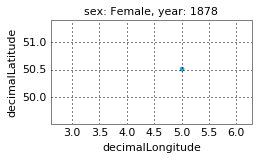
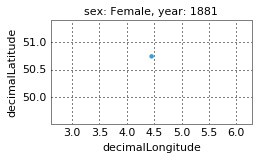
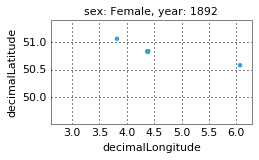
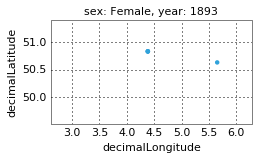
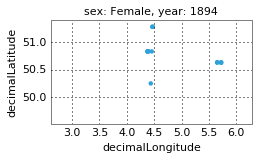
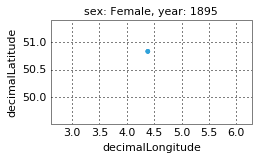
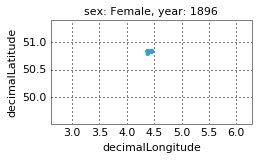
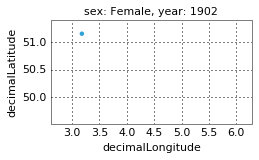
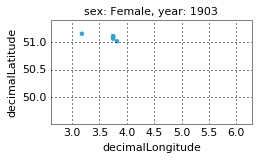
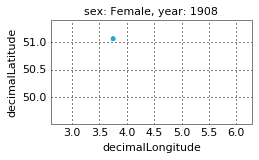
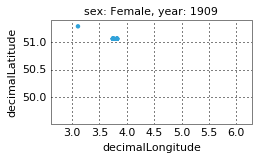
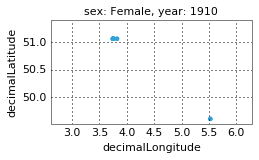
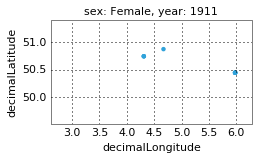
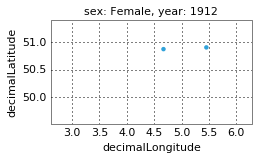
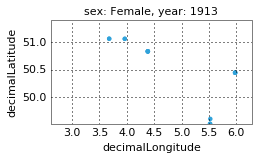
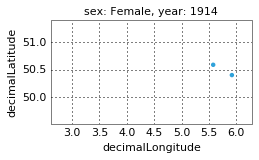
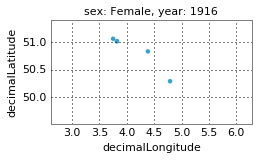
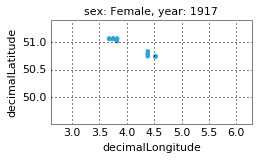
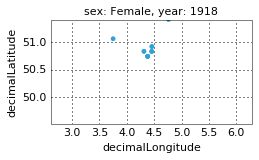
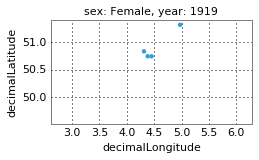
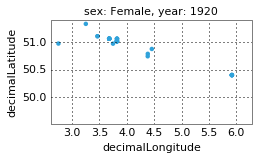
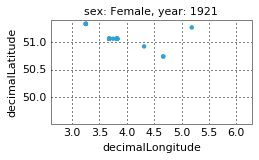
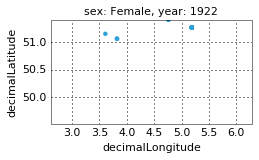
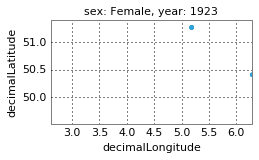
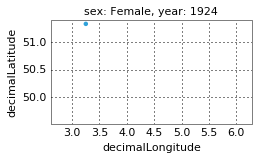
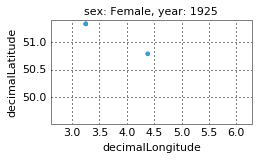
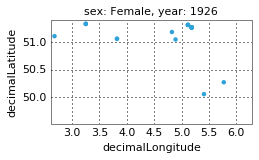
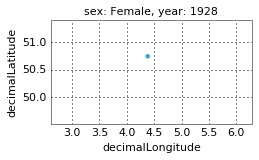
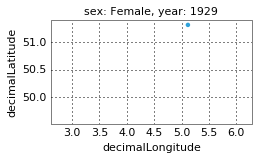
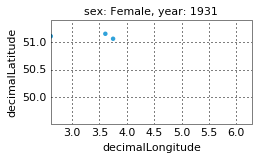
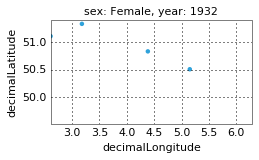
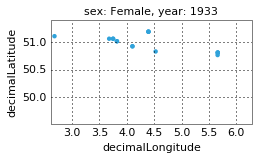
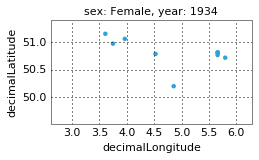
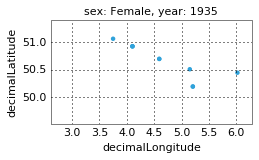
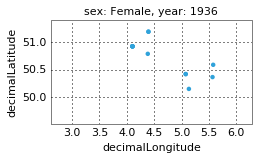
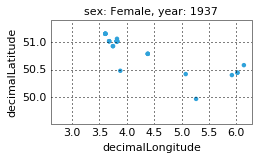
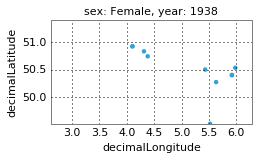
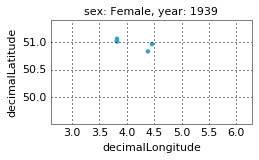
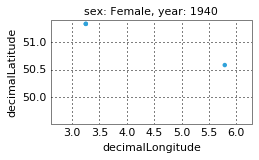
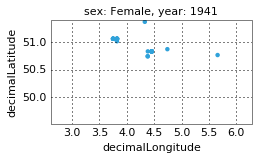
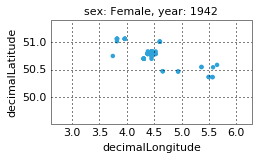
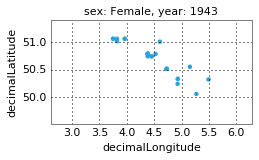
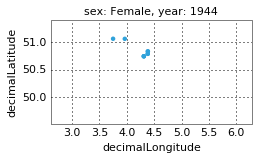
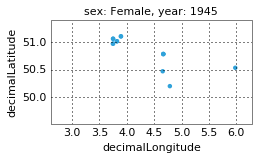
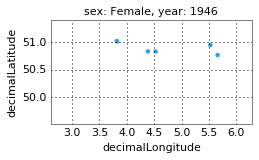
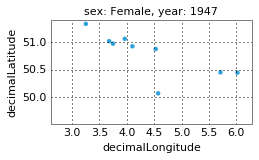
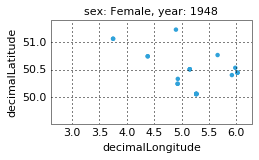
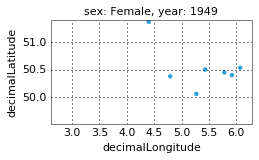
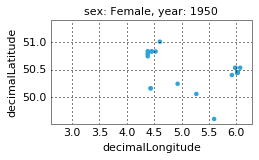
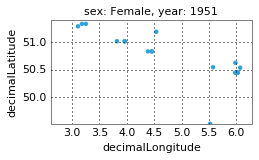
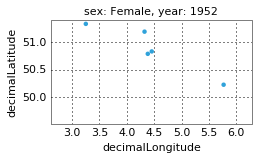
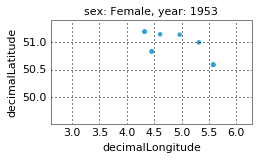
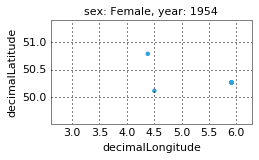
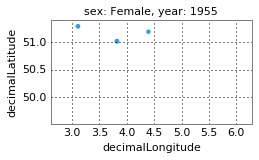
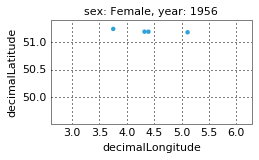
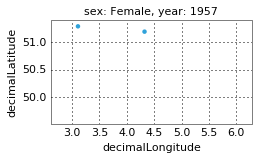
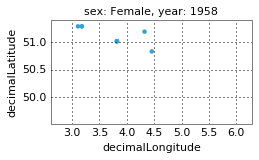
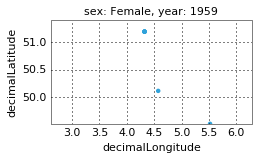
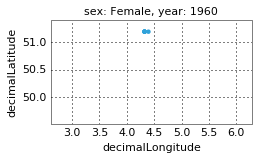
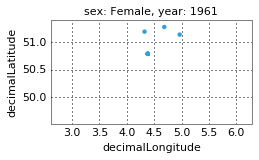
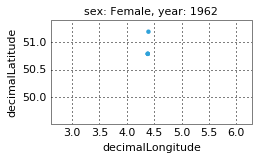
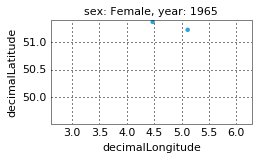
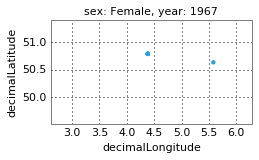
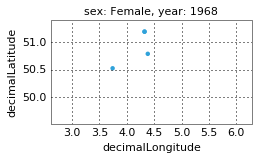
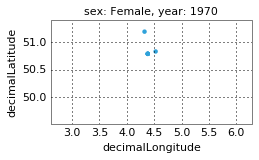
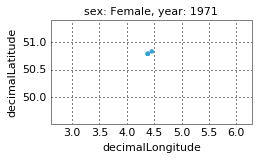
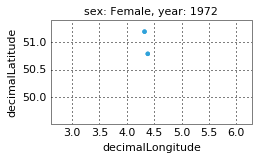
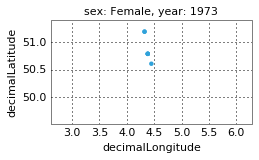
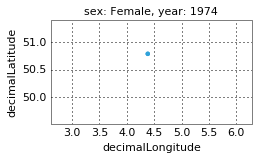
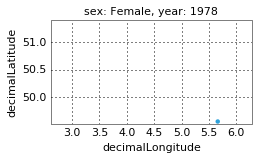
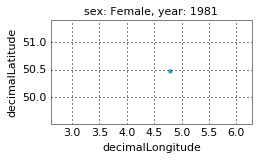
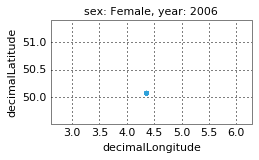
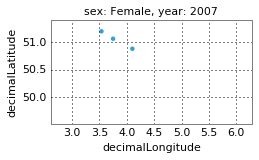
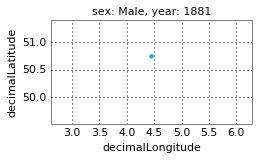
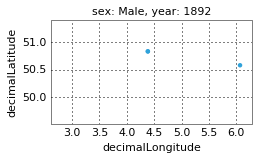
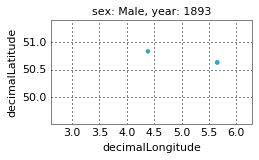
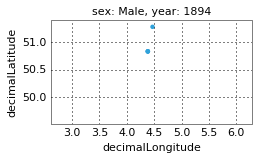
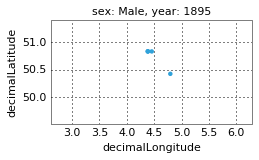
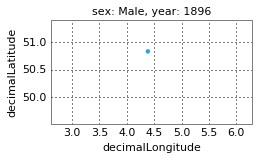
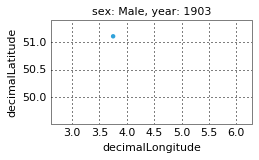
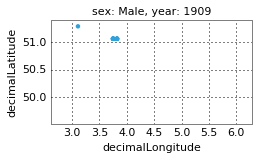
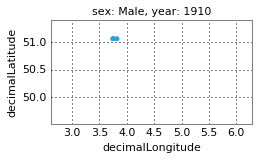
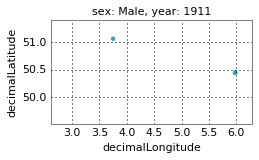
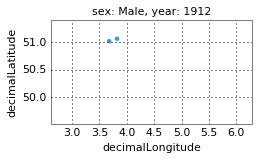
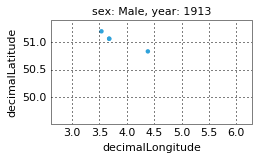
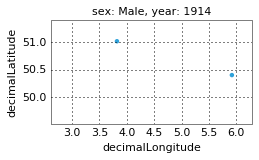
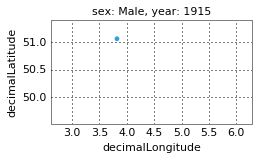
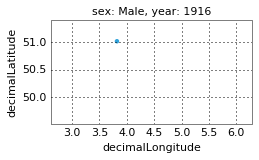
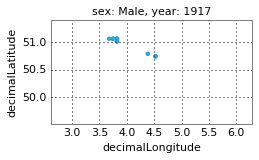
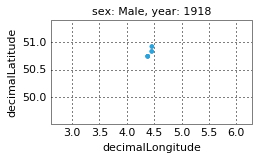
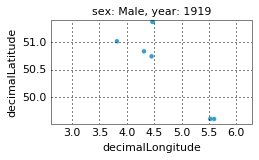
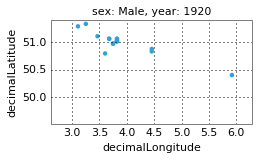
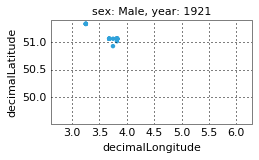
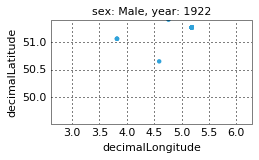
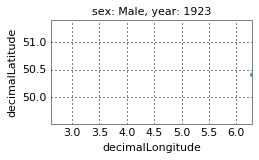
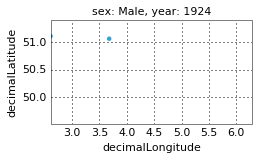
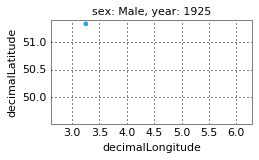
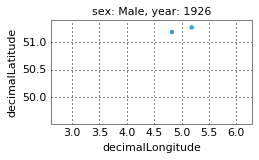
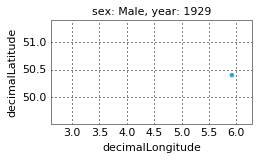
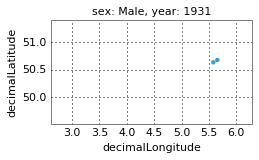
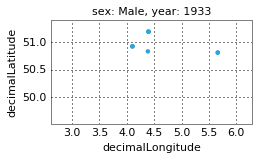
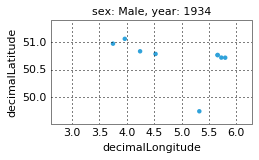
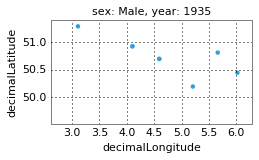
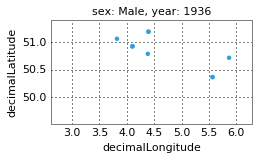
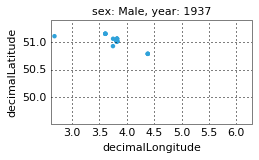
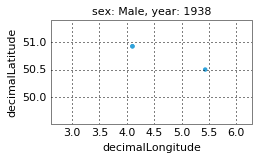
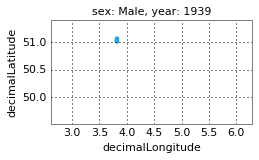
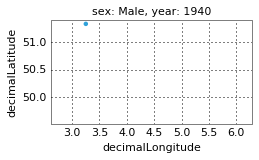
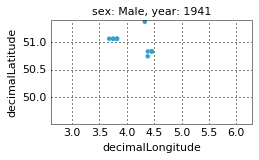
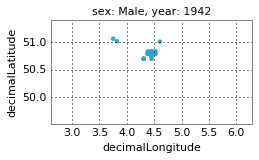
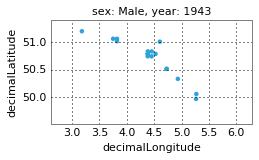
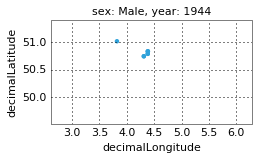
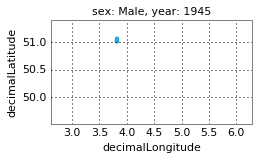
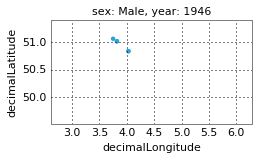
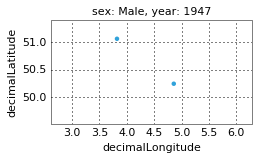
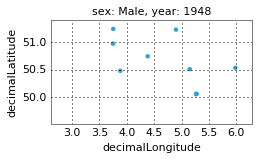
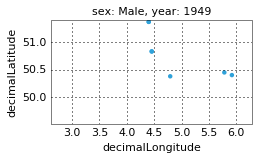
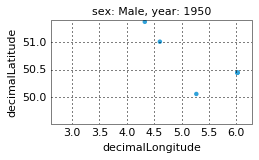
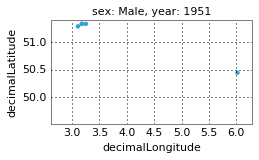
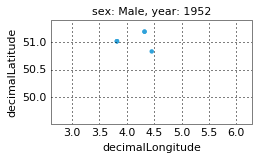
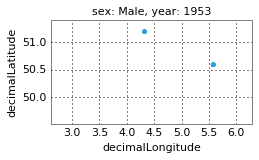
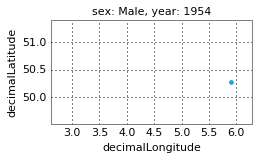
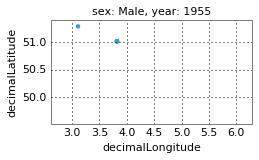
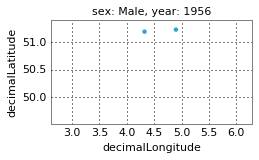
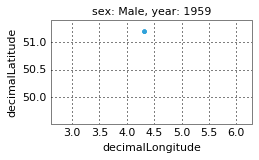
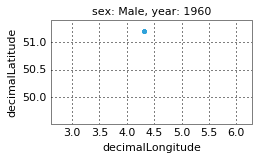
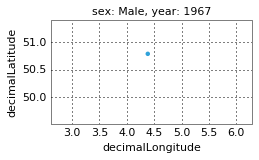
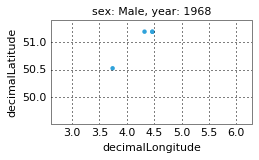
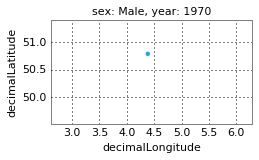
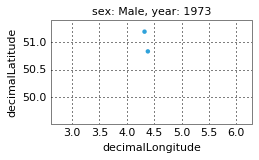
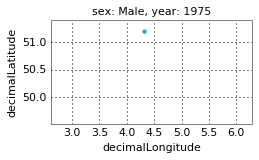
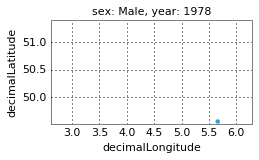
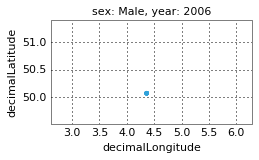
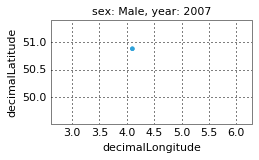
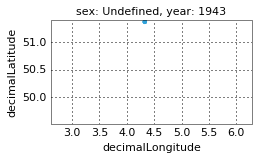
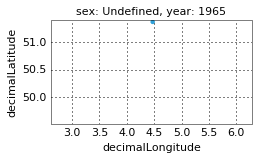

In [19]:
modirisk3